In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.22/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis

import lsfit
reload(lsfit)

import include_modules_root as rt
import Kalman_tom


In [3]:
# Figure save path prefix
savefig.fig_prefix = "plots/singletrack_"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = False         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

In [ ]:
#-------------------
# 2. Angular Grid From CMS to any point in the decay volume
nevents = 30_00 # number of events
p_mag = 100_000 # MeV/c
box_lim = np.array([[70.0, 70+99], [-49.5, 49.5], [-6, 25-6]])*1000 # xyz limit of the decay volume, detector coordinate
z_cms = 85.47*1000 # z offset of CMS
vertex =[0,0,z_cms] #from IP
#r_1 = [70+99,-49.5,-6]-[0,0,z_cms]
#r_2 = [70,49.5,25-6]-[0,0,z_cms]
theta_range_low = np.arctan(-49.5/70+99)
theta_range_high = np.arctan(49.5/70)


data_filename = "Scripts/muon_cms.txt"

with open(data_filename,"w+")  as f:
    f.write(f"# nevents {nevents}\n")
    for i in range(nevents):

        theta = rng.uniform(theta_range_low, theta_range_high)
        phi = rng.uniform(0, 2*np.pi)
        p_unit=np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), -np.cos(theta)])
        p_unit=p_unit/np.sqrt(np.sum(p_unit**2))
        p = p_mag*p_unit
        f.write(f"n {i}\n")
        f.write(f"\t 13 \t {vertex[0]} \t {vertex[1]} \t {vertex[2]}  \t {p[0]} \t {p[1]} \t {p[2]} \n")
        
        
with open(os.path.splitext(data_filename)[0]+".mac","w+")  as f:
    f.write(f"/det/select Box \n")
    f.write(f"/gen/select file_reader \n")
    f.write(f"/gen/file_reader/pathname {os.path.abspath(data_filename)} \n")
    f.write(f"/run/beamOn {nevents} \n")    


In [59]:
eta_1=np.arctan(65.5/169.5)
eta_2=np.arctan((65.5+29.5)/69.5)
phi=np.arctan(50/69.5)
print(-np.log(tan((eta_2)/2)))

0.6783451477290272


In [ ]:
import random
def spherepicking(n):
    while True:           #to get rid off [0,0,0,0] case
        l = [random.gauss(0, 1) for i in range(n)]
        sumsq = sum([x * x for x in l])
        if sumsq > 0:
            break
    norm = 1.0 / math.sqrt(sumsq)
    pt = [x * norm for x in l]
    return pt

print(spherepicking(4))


In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
p_unit=[]
for i in range(1000):
    pt=spherepicking(4)     
    p_unit.append((np.array([pt[0], pt[1], -pt[2]])))

    ax.scatter(*p_unit[i])
ax.set_aspect('auto')
plt.show()

### Generate simulation script

The script is then submitted with the python file in scripts/submit_jobs_singletrack_large_angle.py

In [ ]:
#-------------------
# 1. Gun at the center of the module
vertex = np.array([124.5, 5, 1])*1000 # mm
nevents = 100_00 # number of events
p_mag = 100_000 # MeV/c
rng = np.random.default_rng(seed=1)
theta_range=np.arctan(44.5/8)
n_dims=4
n_samples=1
data_filename = "Scripts/muon_large_angle.txt"
with open(data_filename,"w+")  as f:
    f.write(f"# nevents {nevents}\n")
    for i in range(nevents):

        pt=spherepicking(3)     
        p_unit=np.array([pt[0], pt[1], -pt[2]])

        #p_unit=p_unit/np.sqrt(np.sum(p_unit**2))
        p = p_mag*p_unit
        f.write(f"n {i}\n")
        f.write(f"\t 13 \t {vertex[0]} \t {vertex[1]} \t {vertex[2]}  \t {p[0]} \t {p[1]} \t {p[2]} \n")                
with open(os.path.splitext(data_filename)[0]+".mac","w+")  as f:
    f.write(f"/det/select Box \n")
    f.write(f"/gen/select file_reader \n")
    f.write(f"/gen/file_reader/pathname {os.path.abspath(data_filename)} \n")
    f.write(f"/run/beamOn {nevents} \n")
    
    
#-------------------
# 2. momentum From CMS to any point in the decay volume
box_lim = np.array([[70.0, 70+99], [-49.5, 49.5], [-6, 25-6]])*1000 # xyz limit of the decay volume, detector coordinate
z_cms = 85.47*1000 # z offset of CMS
r_1 = [70+99,-49.5,-6]-[0,0,z_cms]
r_2 = [70,49.5,25-6]-[0,0,z_cms]
theta_range_low = np.arctan(-49.5/70+99)
theta_range_high = np.arctan(49.5/70)


data_filename = "Scripts/muon_cms.txt"

with open(data_filename,"w+")  as f:
    f.write(f"# nevents {nevents}\n")
    for i in range(nevents):
        vertex =[0,0,z_cms] #from IP
        theta = rng.uniform(theta_range_low, theta_range_high)
        phi = rng.uniform(0, 2*np.pi)
        p_unit=np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), -np.cos(theta)])
        p_unit=p_unit/np.sqrt(np.sum(p_unit**2))
        p = p_mag*p_unit
        f.write(f"n {i}\n")
        f.write(f"\t 13 \t {vertex[0]} \t {vertex[1]} \t {vertex[2]}  \t {p[0]} \t {p[1]} \t {p[2]} \n")
        
        
with open(os.path.splitext(data_filename)[0]+".mac","w+")  as f:
    f.write(f"/det/select Box \n")
    f.write(f"/gen/select file_reader \n")
    f.write(f"/gen/file_reader/pathname {os.path.abspath(data_filename)} \n")
    f.write(f"/run/beamOn {nevents} \n")    

# Run with:
# simulation -q -o /project/def-mdiamond/tomren/mathusla/data/fit_study_6layer/muon_100_GeV_large_angle/ -s muon_large_angle.mac

In [4]:
def get_newest(dir_):
    Data_dir= dir_
    entries = os.listdir(Data_dir)
    for file in entries:
        for j in entries:
            if j > file :
                continue
        
            else:
                j = file
    entries = os.listdir(f"{dir_}/{j}")
    for file in entries:
        for j in entries:
            if j > file :
                continue
        
            else:
                j = file
    
    return j





### Check the angle range

In [60]:
file=get_newest("/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular")
filenames = [f"/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230603/{file}/run0.root",f"{file}/muon_100_GeV_CMS//20230518/180557/run0.root",]
filenames_recon = [f"/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230603/{file}/stat0.root",f"{file}/muon_100_GeV_CMS//20230518/180557/stat_seedmod.root",]
print("./tracker",filenames[0], f"/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230603/{file}")

./tracker /home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230603/112817/run0.root /home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/Data/Grid/Angular/20230603/112817


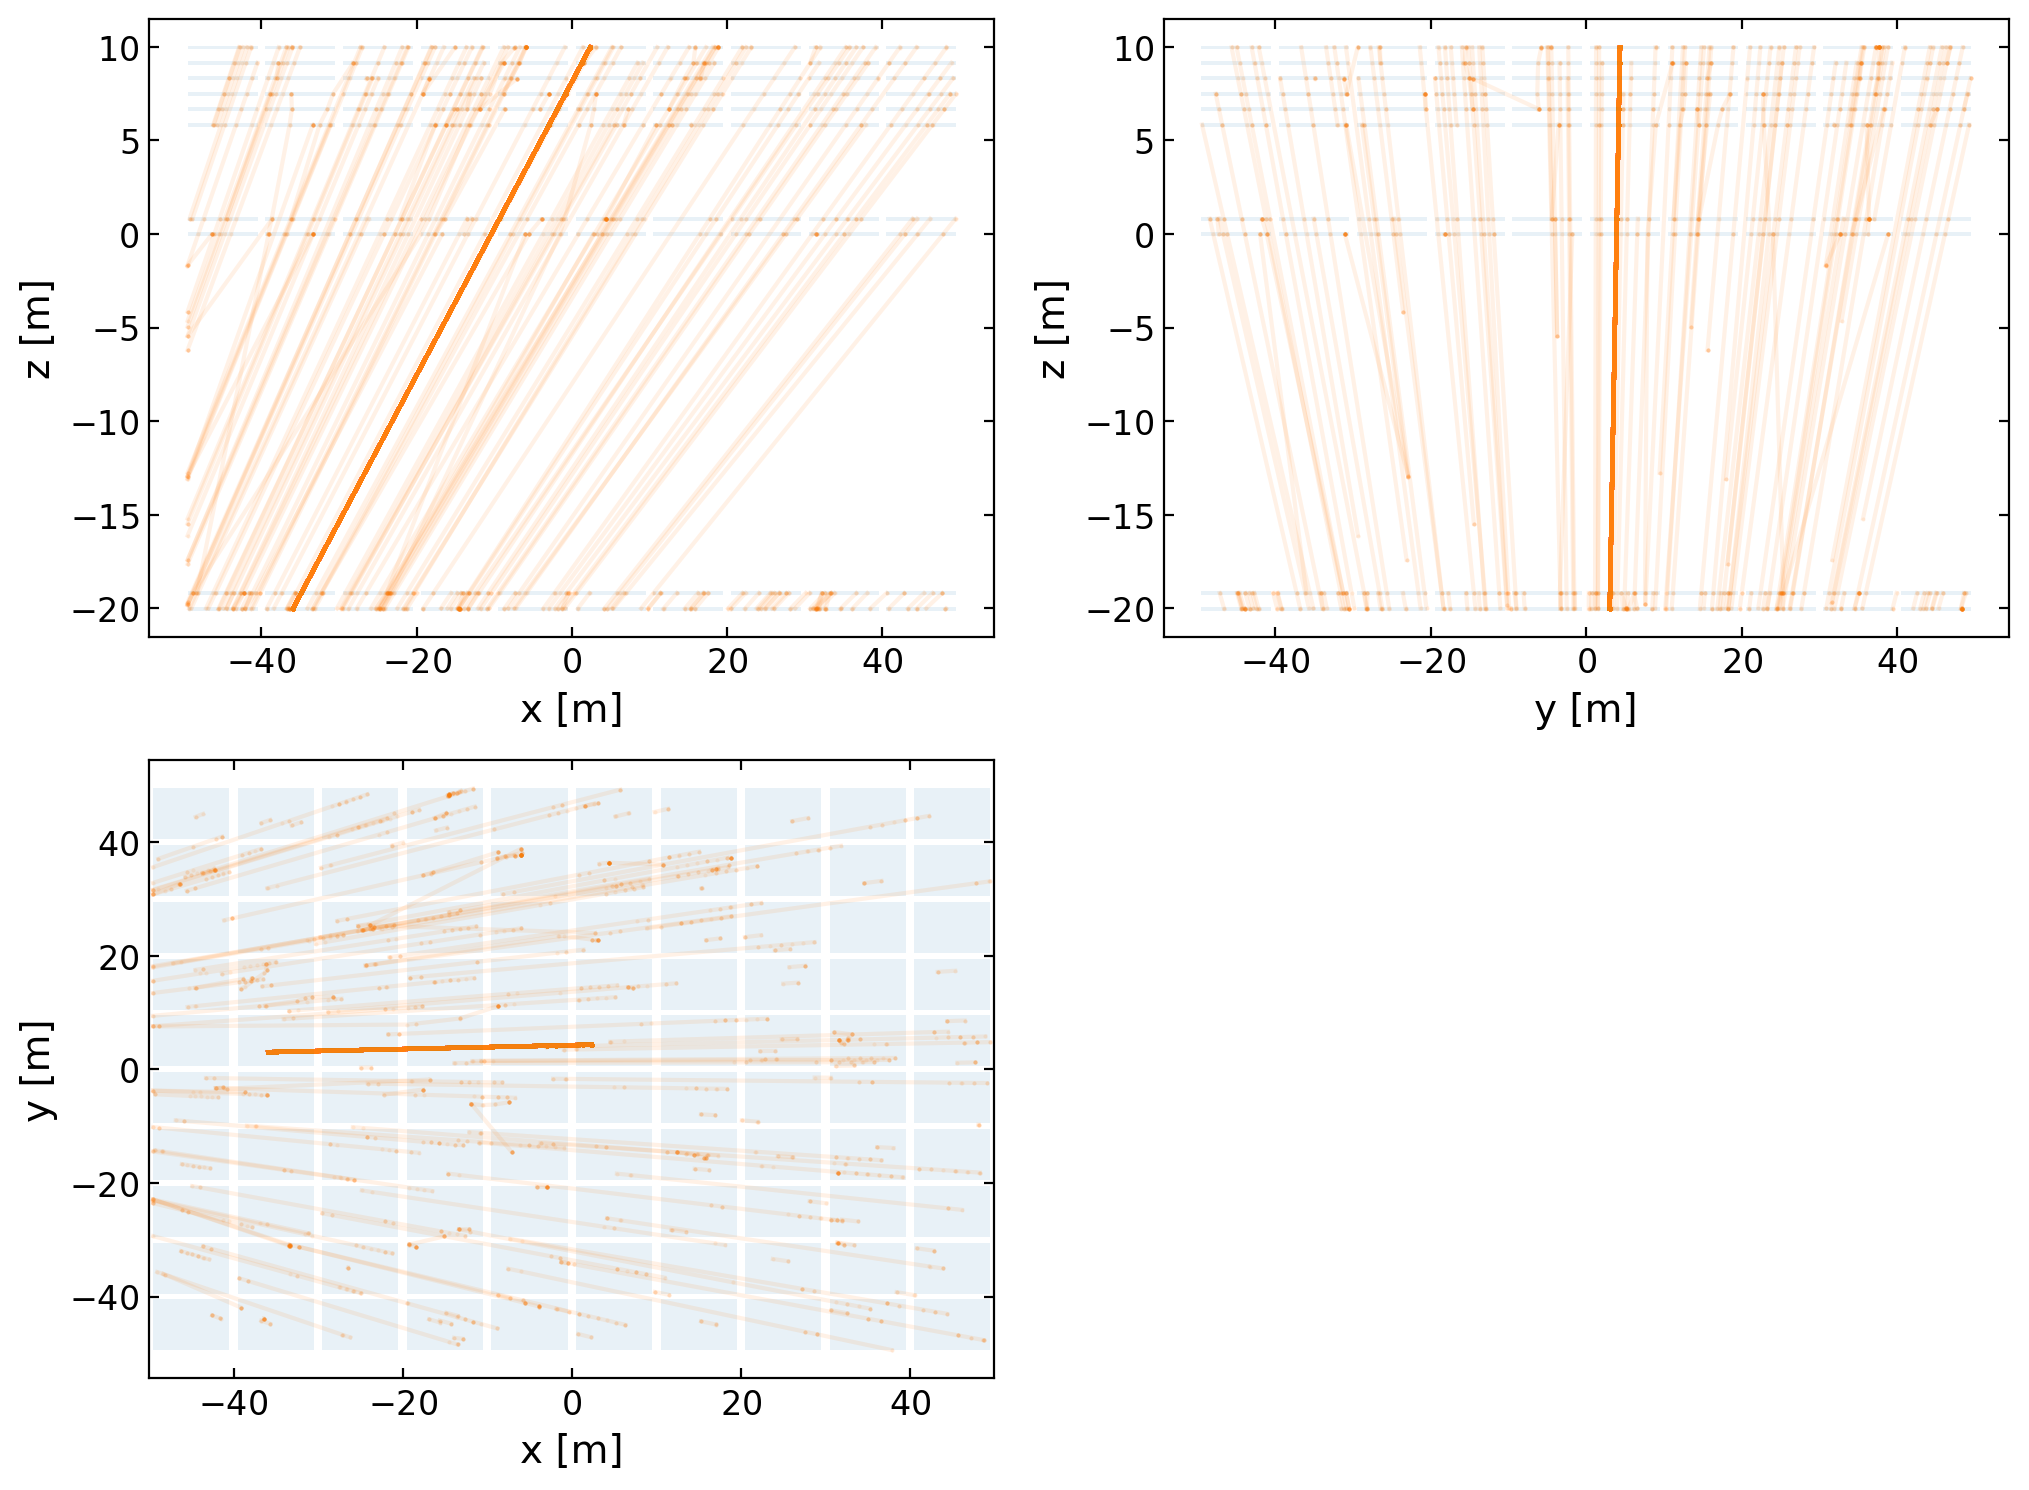

In [61]:
tree_name = "box_run"
vis.plot_multiple_events(filenames[0], tree_name, nevents=300)
#vis.plot_multiple_events(filenames[1], tree_name, nevents=600)


# Efficiency vs angle

In [62]:
data = lsfit.get_km(filenames_recon[0])

  0%|          | 0/133 [00:00<?, ?it/s]/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/lsfit.py:249: RuntimeWarning: invalid value encountered in sqrt
  results_fit["recon_error"].append(np.sqrt(par_km_error))
100%|██████████| 133/133 [00:00<00:00, 2767.36it/s]
/home/cfpuser/Mathusla/Mathusla_Effeciency_Grid-main/lsfit.py:258: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  results_fit[key]=np.array(results_fit[key])


In [63]:
# Make a fixed range cut for tight and looser track
recon = data["recon"]
truth = data["truth"]
diffx = recon[:,2]-truth[:,2]
diffy = recon[:,0]-truth[:,0]
diffvx = recon[:,6]-truth[:,6]
diffvy = recon[:,4]-truth[:,4] 
mask_TIGHT  = (np.abs(diffx)<5) & (np.abs(diffy)<5) & (np.abs(diffvx)<0.5) & (np.abs(diffvy)<0.5)
mask_LOOSER = (np.abs(diffx)<10) & (np.abs(diffy)<10) & (np.abs(diffvx)<1) & (np.abs(diffvy)<1)

In [64]:
data["eta"] = np.arctanh(data["truth"][:,6]/np.sqrt(data["truth"][:,4]**2 +data["truth"][:,5]**2 + data["truth"][:,6]**2))
data["phi"] = np.arctan(data["truth"][:,4]/data["truth"][:,5])

In [127]:
data["phi"]

array([-0.55586248,  0.14897204,  0.22147827,  0.0838047 ,  0.28137312,
       -0.32679879, -0.30900346,  0.35139856,  0.11054975, -0.28936181,
        0.37863296, -0.47050033,  0.21176737,  0.56746885,  0.48499371,
       -0.58260496,  0.33566512,  0.38097026,  0.11604976, -0.36180692,
       -0.41523592, -0.50557744,  0.25970357, -0.56796292, -0.58924513,
       -0.40105758, -0.05664867, -0.43966032,  0.64090839, -0.5901739 ,
       -0.27154565,  0.47088123,  0.21151204, -0.38952002, -0.11122896,
        0.48868521,  0.37674297, -0.55148842, -0.04953006, -0.12768322,
       -0.5425921 , -0.25537245,  0.25628323, -0.36103766,  0.09137292,
        0.00462362, -0.14507583,  0.6041967 ,  0.56690189,  0.40344602,
        0.1593303 ,  0.04829594,  0.38571422,  0.256089  ,  0.35528082,
       -0.02623852, -0.39533791,  0.13129782, -0.41507534, -0.51025533,
        0.81485498,  0.59402882, -0.16032637, -0.61462866,  0.46005832,
       -0.56984014,  0.1275382 ,  0.28632759, -0.44907148, -0.26

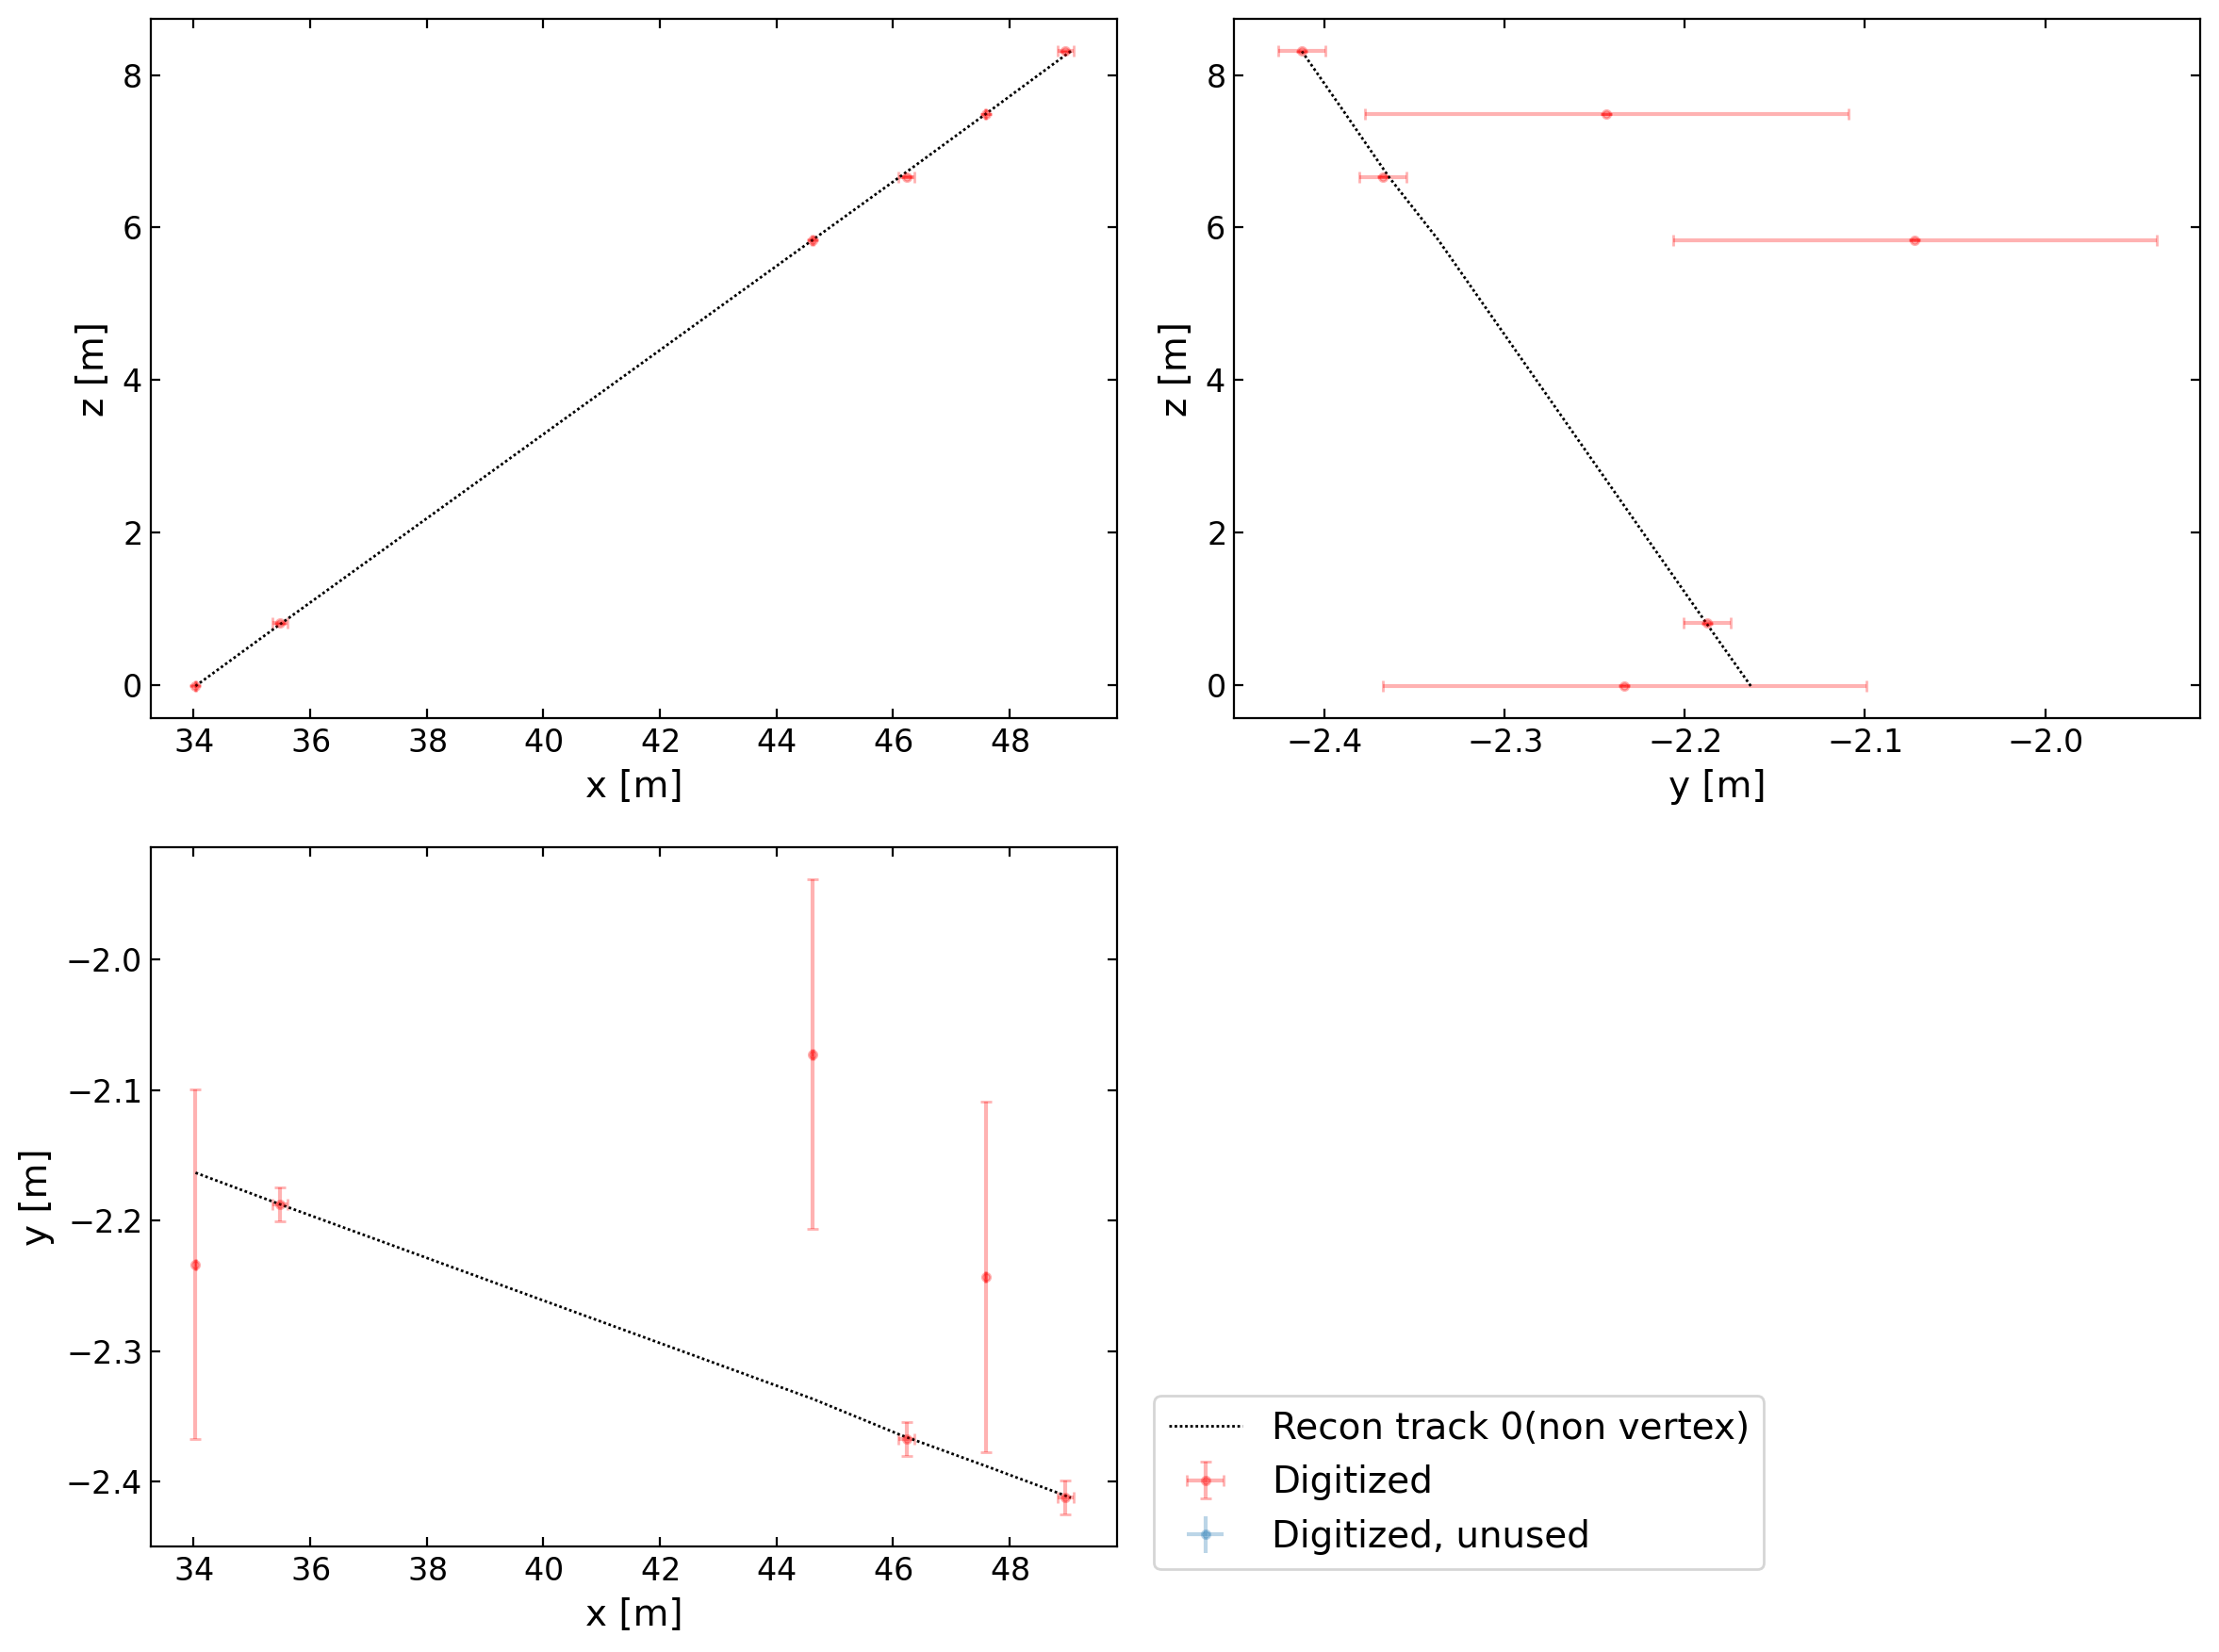

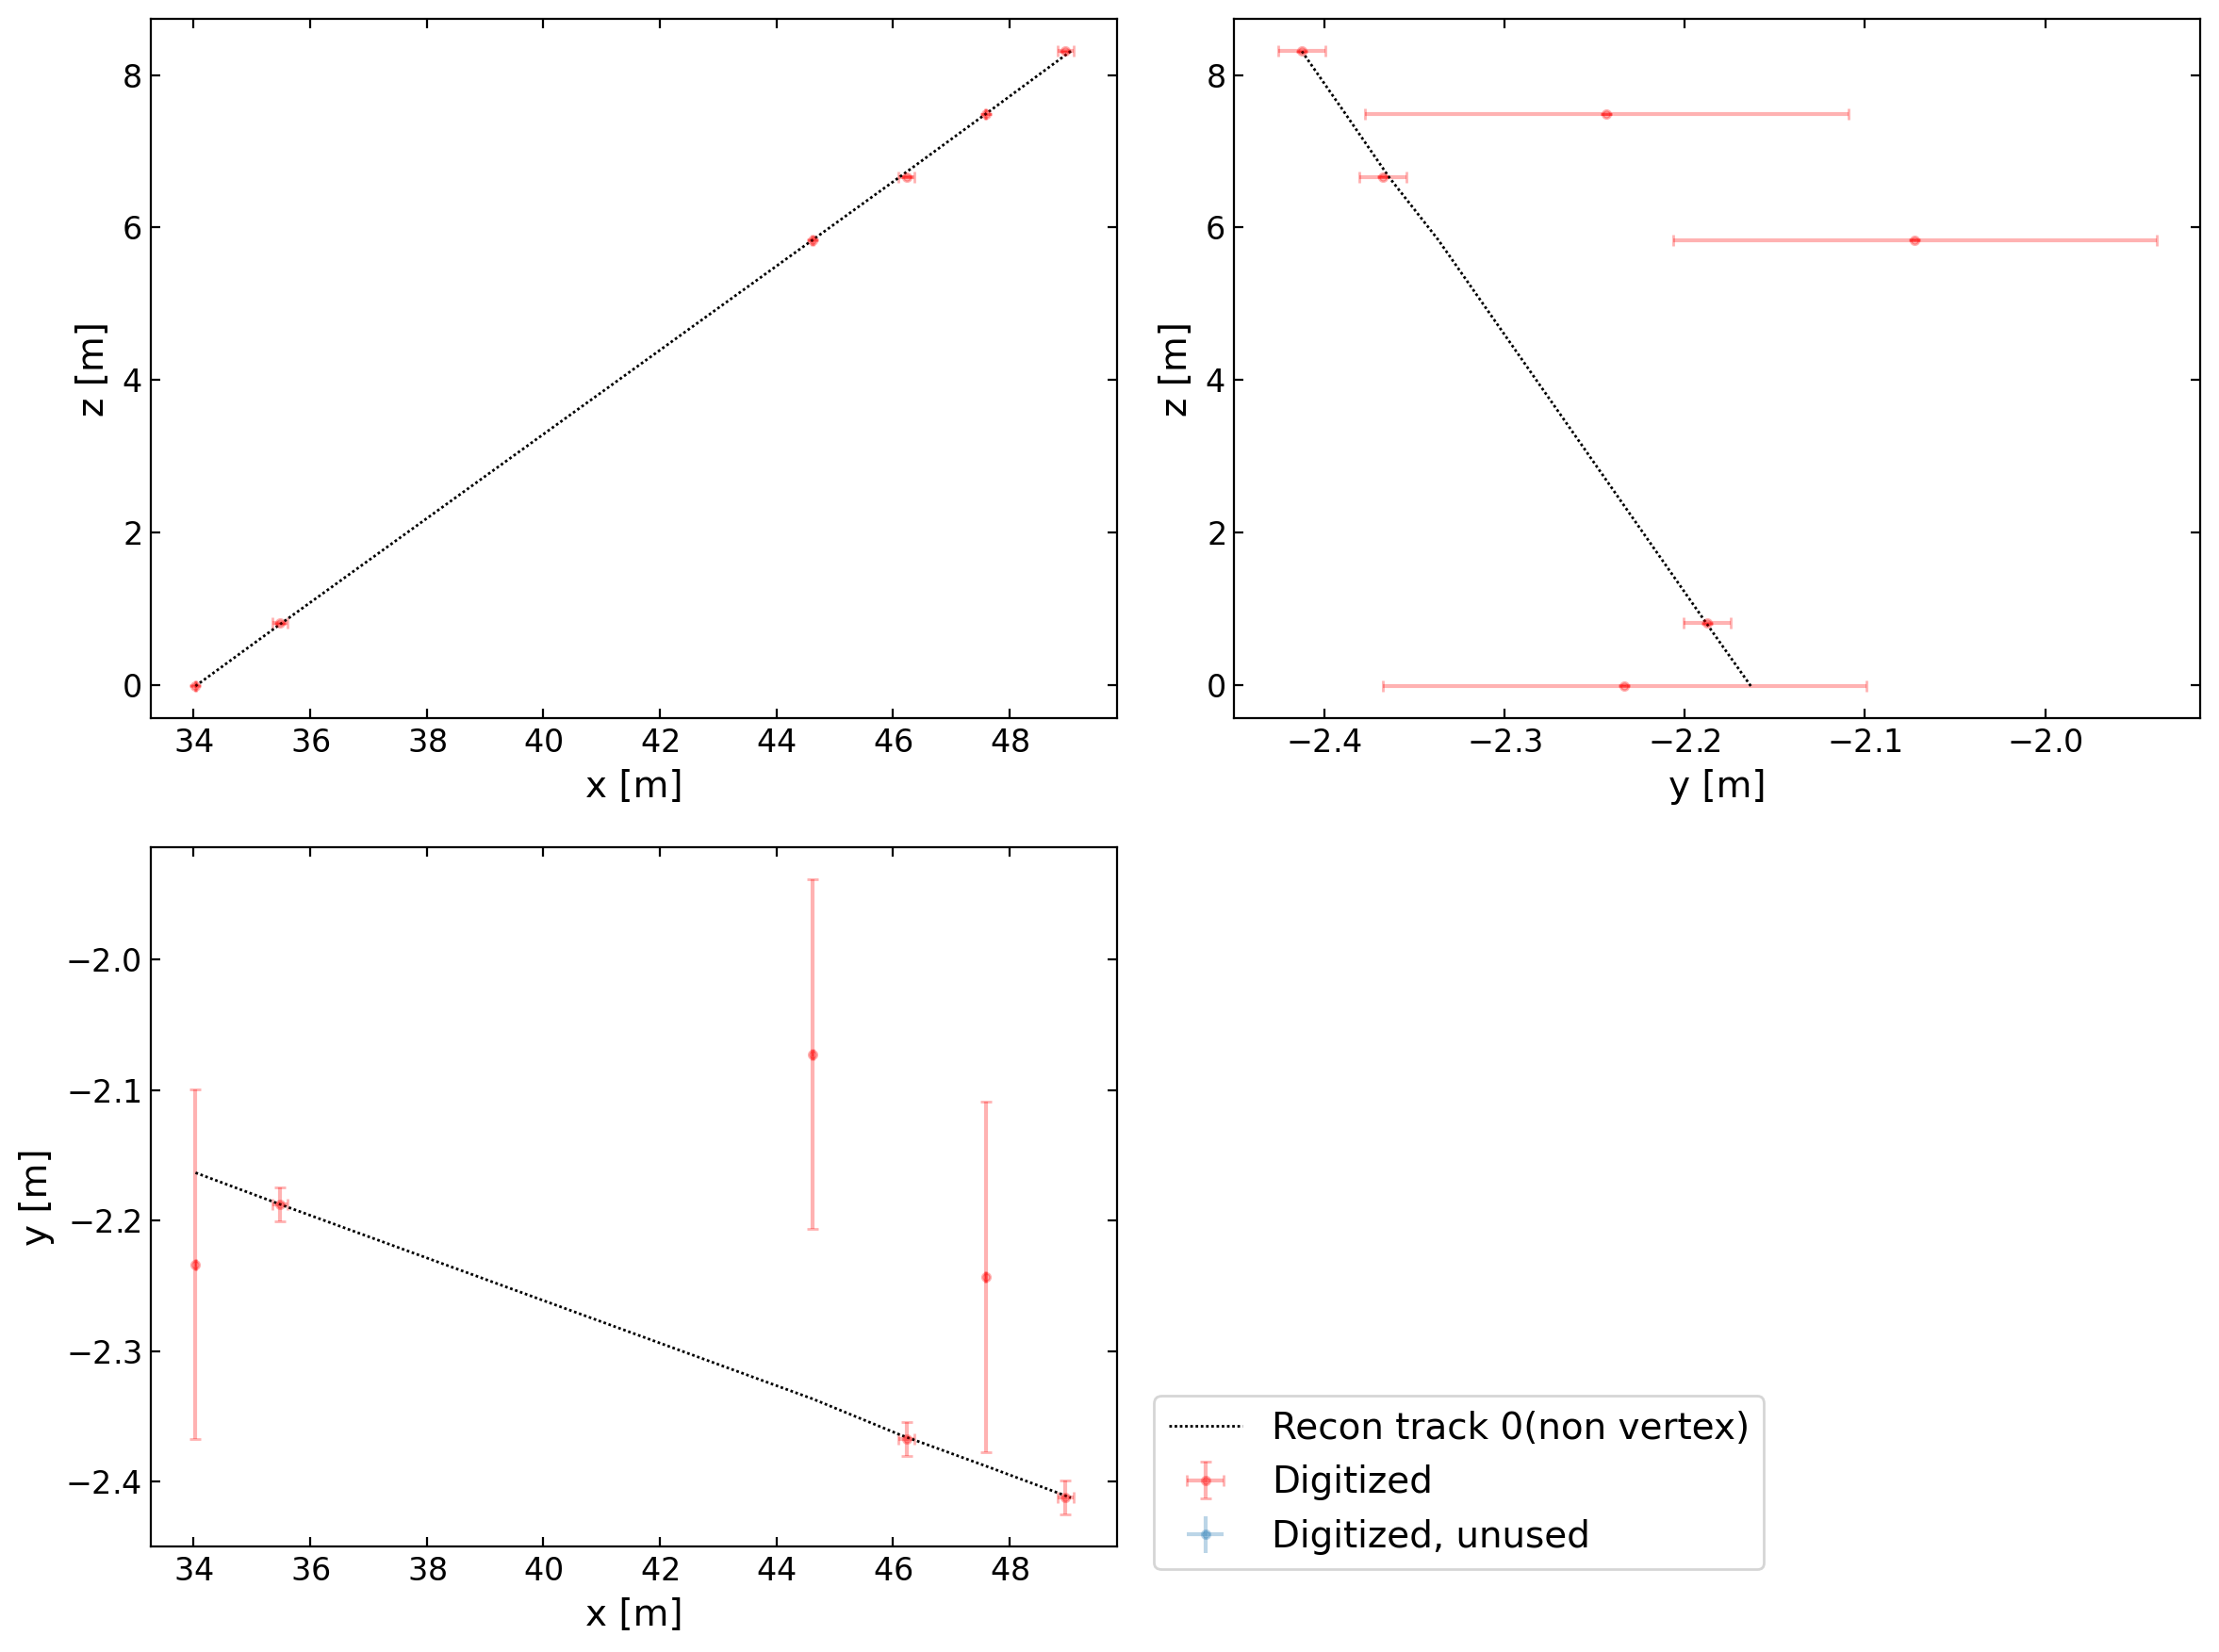

In [126]:
ev=event.Event(filenames_recon[0],EventNumber=102)
vis.plot_recon(ev)

In [ ]:
eta=[]
phi=[]
data["eta"] = np.arctanh(data["truth"][:,6]/np.sqrt(data["truth"][:,4]**2 +data["truth"][:,5]**2 + data["truth"][:,6]**2))
data["phi"] = np.arctan(data["truth"][:,4]/data["truth"][:,5])
for i in range(len(data["eta"])):
    eta.append(data["eta"][i])
    phi.append(data["phi"][i])
n_cuts = 10
bins_eta = np.linspace(min(eta), max(eta), n_cuts+1)
bincenters_eta = 0.5*(bins_eta[1:]+bins_eta[:-1])
bins_phi = np.linspace(min(phi), max(phi), n_cuts+1)
bincenters_phi = 0.5*(bins_phi[1:]+bins_phi[:-1])
trackeff=[]

for i in range(n_cuts):
    eff = []
    mask = (eta>bins_eta[i])&(eta<bins_eta[i+1])
    for j in range(n_cuts):
        mask_phi = (phi>bins_phi[j])&(phi<bins_phi[j+1])    
        n_pass = sum(data["mask_recon_success"]&mask&mask_phi)
        n_total = sum(mask)
        eff.append(n_pass/n_total)
    trackeff.append(eff)
trr=np.array(trackeff)

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, ax = plt.subplots(figsize=(10,10))
xy= np.add.outer(bincenters_eta, bincenters_phi)
nx, ny = trr.shape
indx, indy = np.arange(nx), np.arange(ny)
x, y = np.meshgrid(indx, indy)
ax.imshow(trr, interpolation="nearest", cmap=cm.YlGn) # plot grid values

for xval, yval in zip(x.flatten(), y.flatten()):
    zval = trr[xval,yval]
    t = "%.1f%%"%(zval,) # format value with 1 decimal point
    #c = 'w' if zval > 0.75 else 'k' # if dark-green, change text color to white
    ax.text(xval, yval, t, va='center', ha='center')
#set tick marks for grid
xlabels = np.round(bincenters_eta,2)
ylabels = np.round(bincenters_phi,2)
ax.set_xticks(indx+0.5) # offset x/y ticks so gridlines run on border of boxes
ax.set_yticks(indy+0.5)
# the tick labels, if you want them centered need to be adjusted in
# this special way.
for a, ind, labels in zip((ax.xaxis, ax.yaxis), (indx, indy),
                          (xlabels, ylabels)):
    a.set_major_formatter(ticker.NullFormatter())
    a.set_minor_locator(ticker.FixedLocator(ind))
    a.set_minor_formatter(ticker.FixedFormatter(labels))

ax.xaxis.tick_top()



In [ ]:
trr